In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='5d1c697b-8d2a-46aa-bac1-d16762d191f0', project_access_token='p-a673947715cf8a867f75d0a935c8041b18cced6f')
pc = project.project_context

In [2]:
!pip install imbalanced-learn==0.4.3

In [3]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


In [4]:
!pip install scikit-learn==0.22

In [5]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Download dos conjuntos de dados em formato .csv

In [6]:
import pandas as pd

In [7]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-20 22:42:39--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1736600 (1.7M) [text/plain]
Saving to: ‘training_dataset.csv.3’

100%[======================================>] 1,736,600   --.-K/s   in 0.05s   

2020-09-20 22:42:39 (34.1 MB/s) - ‘training_dataset.csv.3’ saved [1736600/1736600]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [8]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
id                            13945 non-null float64
graduacao                     13950 non-null object
universidade                  13920 non-null object
profissao                     13977 non-null object
organizacao                   13961 non-null object
pretende_fazer_cursos_lit     13989 non-null float64
interesse_mba_lit             14003 non-null float64
importante_ter_certificado    13918 non-null float64
horas_semanais_estudo         13959 non-null float64
como_conheceu_lit             13915 non-null object
total_modulos                 13987 non-null float64
modulos_iniciados             14044 non-null float64
modulos_finalizados           13924 non-null float64
certificados                  13979 non-null float64
categoria                     15857 non-null object
dtypes: float64(9), object(6)
memory usage: 1.8+ MB


In [9]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

## Gráficos

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

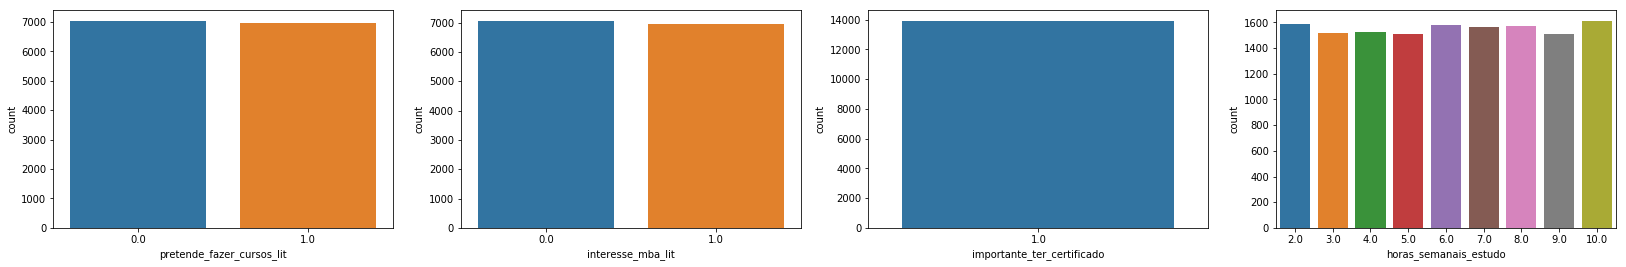

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='pretende_fazer_cursos_lit', data=df_training_dataset)
sns.countplot(ax=axes[1], x='interesse_mba_lit', data=df_training_dataset)
sns.countplot(ax=axes[2], x='importante_ter_certificado', data=df_training_dataset)
sns.countplot(ax=axes[3], x='horas_semanais_estudo', data=df_training_dataset)

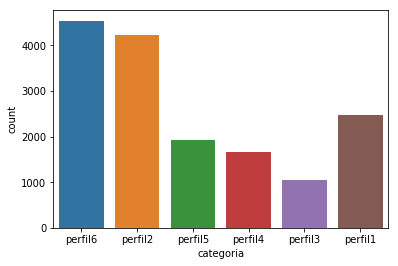

In [12]:
# coluna 'categoria' desbalanceada
fig = plt.plot()
sns.countplot(x='categoria', data=df_training_dataset)

### Eliminando colunas indesejadas

In [13]:
df_training_dataset.tail(0)

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria


In [14]:
df_training_dataset.drop(columns=['id', 'universidade', 'graduacao', 'organizacao', 'como_conheceu_lit'], inplace=True)

In [15]:
df_training_dataset.tail()

,profissao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,Outros,0.0,0.0,1.0,8.0,10.0,NaN,NaN,NaN,perfil6
15853,Advogado,0.0,0.0,1.0,7.0,42.0,17.0,15.0,NaN,perfil5
15854,Sócio/Dono/Proprietário,0.0,NaN,1.0,7.0,30.0,9.0,8.0,0.0,perfil5
15855,Advogado,0.0,0.0,1.0,10.0,226.0,102.0,93.0,1.0,perfil1
15856,NaN,1.0,1.0,1.0,9.0,125.0,98.0,97.0,1.0,perfil1


<hr>

## Pre-processando o dataset antes do treinamento

### Alterando os valores NaN em determinadas colunas

#### Na coluna 'graduacao' foi trocado os valores NaN por 'SEM FORMACAO'

In [16]:
df_training_dataset['profissao'].unique()

array(['Analista Senior', 'Supervisor', 'Outros', 'SEM EXPERIÊNCIA',
       'Advogado', 'Assessor', 'Engenheiro', 'Gerente', 'Analista', nan,
       'Diretor', 'Coordenador', 'Sócio/Dono/Proprietário'], dtype=object)

In [17]:
df_training_dataset['profissao'].fillna('SEM EXPERIÊNCIA', inplace = True)

In [18]:
df_training_dataset[df_training_dataset['profissao'].isnull() == True].head()

,profissao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding".

In [19]:
from sklearn.preprocessing import LabelEncoder

lbp = LabelEncoder()

#### Alteração da coluna 'graduacao' para números inteiros

In [20]:
# antes de alterarmos
df_training_dataset['profissao'].unique()

array(['Analista Senior', 'Supervisor', 'Outros', 'SEM EXPERIÊNCIA',
       'Advogado', 'Assessor', 'Engenheiro', 'Gerente', 'Analista',
       'Diretor', 'Coordenador', 'Sócio/Dono/Proprietário'], dtype=object)

In [21]:
df_training_dataset['profissao'] = lbp.fit_transform(df_training_dataset['profissao'])

In [22]:
# após alterarmos
df_training_dataset['profissao'].unique()

array([ 2, 10,  8,  9,  0,  3,  6,  7,  1,  5,  4, 11])

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [23]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

profissao                        0
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64



In [24]:
from sklearn.impute import SimpleImputer
import numpy as np

impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [25]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

profissao                        0
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

profissao                     0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
total_modulos                 0
modulos_iniciados             0
modulos_finalizados           0
certificados                  0
categoria                     0
dtype: int64



In [26]:
df_training = df_training_dataset_imputed.copy()

## Gráficos após as alterações

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

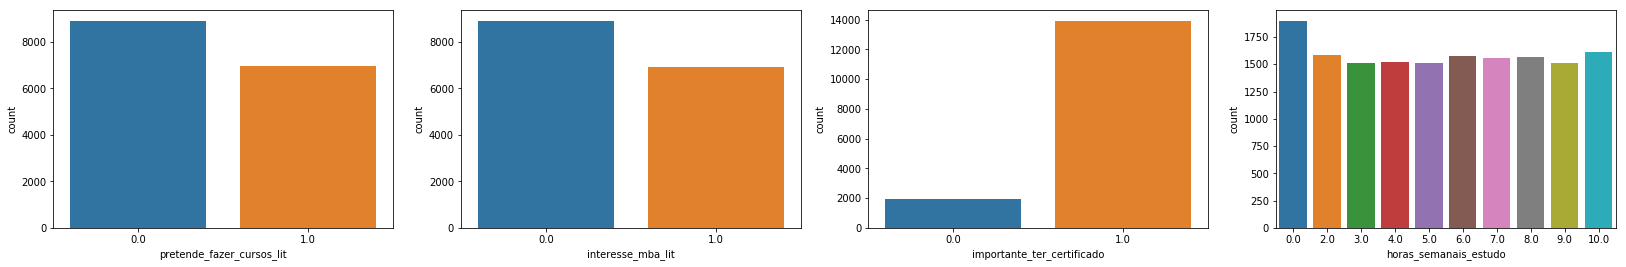

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='pretende_fazer_cursos_lit', data=df_training_dataset_imputed)
sns.countplot(ax=axes[1], x='interesse_mba_lit', data=df_training_dataset_imputed)
sns.countplot(ax=axes[2], x='importante_ter_certificado', data=df_training_dataset_imputed)
sns.countplot(ax=axes[3], x='horas_semanais_estudo', data=df_training_dataset_imputed)

<hr>

### Selecionando FEATURES e definindo a variável TARGET

In [29]:
df_training.columns

Index(['profissao', 'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'categoria'],
      dtype='object')

In [30]:
X = df_training[
    [
    'profissao', 'pretende_fazer_cursos_lit', 'interesse_mba_lit',
    'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
    'modulos_iniciados', 'modulos_finalizados', 'certificados'
    ]
]
y = df_training['categoria']

#### Gráficos da classe 'PERFIL' antes do balanceamento dos dados

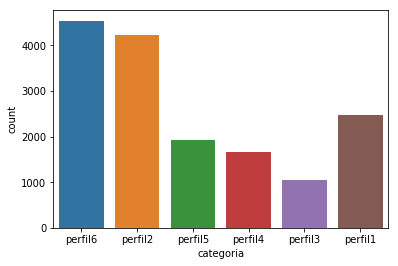

In [31]:
import seaborn as sns
ax = sns.countplot(x=y, data=df_training)

### Balanceamento dos dados da coluna 'TARGET' com 'SMOTE'

In [32]:
from imblearn.over_sampling import SMOTE

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
# sampling_strategy = 0.5
smt = SMOTE(sampling_strategy='all')

In [34]:
X, y = smt.fit_sample(X, y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in

#### Gráficos da coluna 'PERFIL' após o balanceamento dos dados

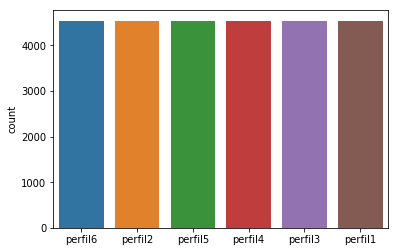

In [35]:
import seaborn as sns
ax = sns.countplot(x=y, data=df_training)

## Importações dos algortimos de Machine Learning

In [36]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Regressão Logistica
from sklearn.linear_model import LogisticRegression
# XGB
import xgboost as xgb
# kNN (vizinhos mais próximos)
from sklearn.neighbors import KNeighborsClassifier
# Redes neurais artificiais
from sklearn.neural_network import MLPClassifier

### Criação do modelo através da matriz de confusão

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=133)

<hr>

## Nesta parte foi feito a configuração de todos os algoritmos usados
Para isso, foi feito um teste com todos os algoritmos para tornâ-los com resultados mais relevantes alterando as suas métricas iniciais

### Treinando uma árvore de decisão

In [39]:
dtc = DecisionTreeClassifier(max_depth=15)

In [40]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
y_pred_dt = dtc.predict(X_test)

In [42]:
# Acurácia alcançada pela árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_dt), 2)))

Acurácia: 79.0%


In [43]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

     perfil1       0.76      0.73      0.74      1364
     perfil2       0.74      0.74      0.74      1423
     perfil3       0.84      0.83      0.83      1344
     perfil4       0.81      0.81      0.81      1319
     perfil5       0.77      0.80      0.78      1310
     perfil6       0.80      0.81      0.80      1411

    accuracy                           0.79      8171
   macro avg       0.79      0.79      0.79      8171
weighted avg       0.79      0.79      0.79      8171



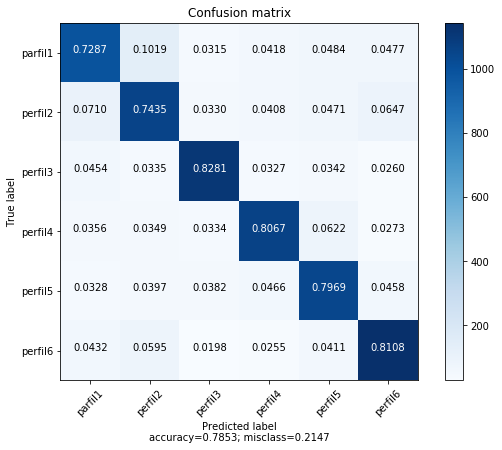

In [44]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dt), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

### Treinando uma Random Forest

In [45]:
random_forest = RandomForestClassifier(n_estimators=123, criterion='gini')

In [46]:
random_forest.fit(X_train, y_train)

y_pred_random = random_forest.predict(X_test)

In [47]:
# Acurácia alcançada pelo algoritmo random forest
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_random), 2)))

Acurácia: 84.0%


In [48]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

     perfil1       0.83      0.80      0.82      1364
     perfil2       0.79      0.83      0.81      1423
     perfil3       0.90      0.87      0.88      1344
     perfil4       0.88      0.86      0.87      1319
     perfil5       0.84      0.85      0.84      1310
     perfil6       0.83      0.85      0.84      1411

    accuracy                           0.84      8171
   macro avg       0.84      0.84      0.84      8171
weighted avg       0.84      0.84      0.84      8171



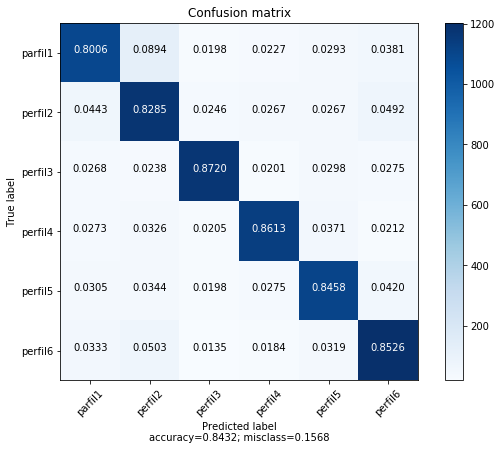

In [49]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_random), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

### Treinando com kNN (Vizinhos mais próximos)

In [50]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)

In [51]:
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [52]:
# Acurácia alcançada pela árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_knn), 2)))

Acurácia: 70.0%


In [53]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

     perfil1       0.58      0.60      0.59      1364
     perfil2       0.62      0.51      0.56      1423
     perfil3       0.75      0.84      0.79      1344
     perfil4       0.77      0.77      0.77      1319
     perfil5       0.75      0.77      0.76      1310
     perfil6       0.75      0.74      0.74      1411

    accuracy                           0.70      8171
   macro avg       0.70      0.70      0.70      8171
weighted avg       0.70      0.70      0.70      8171



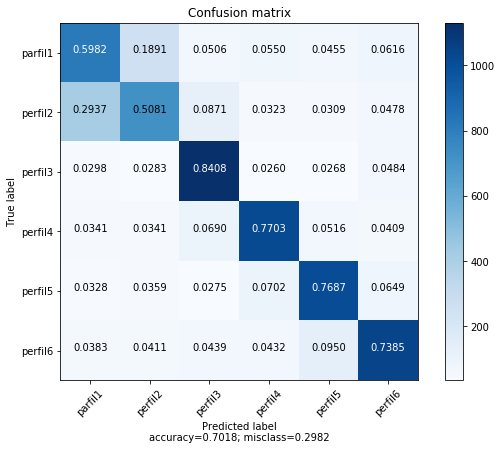

In [54]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

### Treinando com XGBOOST

In [55]:
xg = xgb.XGBClassifier(
    silent=False, 
    nthread=-1,
    learning_rate =0.3,
    n_estimators=123,
    max_depth=7,
    gamma=0.1,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'multi:softmax',
    num_class=6)

In [56]:
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)

[22:42:54] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [57]:
# Acurácia alcançada pelo algoritmo SVM (Máquinas de vetores de suporte)
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_xg), 2)))

Acurácia: 85.0%


In [58]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

     perfil1       0.84      0.80      0.82      1364
     perfil2       0.78      0.82      0.80      1423
     perfil3       0.90      0.88      0.89      1344
     perfil4       0.87      0.86      0.87      1319
     perfil5       0.84      0.86      0.85      1310
     perfil6       0.84      0.85      0.85      1411

    accuracy                           0.85      8171
   macro avg       0.85      0.85      0.85      8171
weighted avg       0.85      0.85      0.85      8171



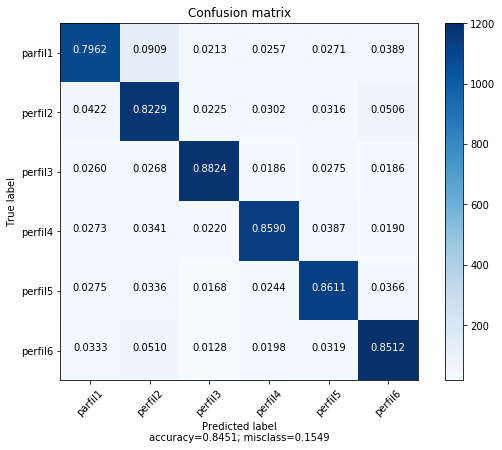

In [59]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_xg), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

### Treinando com Redes neurais artificiais

In [60]:
# interações, tolerância, solução, ativação
rn = MLPClassifier(max_iter=100, tol = 0.000010, solver = 'adam', activation='relu')

In [61]:
rn.fit(X_train, y_train)

y_pred_rn = rn.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [62]:
# Acurácia alcançada pelo algoritmo RN (Redes neurais)
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_rn), 2)))

Acurácia: 73.0%


In [63]:
print(classification_report(y_test, y_pred_rn))

              precision    recall  f1-score   support

     perfil1       0.74      0.77      0.75      1364
     perfil2       0.73      0.61      0.67      1423
     perfil3       0.70      0.77      0.73      1344
     perfil4       0.76      0.72      0.74      1319
     perfil5       0.77      0.71      0.74      1310
     perfil6       0.72      0.81      0.76      1411

    accuracy                           0.73      8171
   macro avg       0.74      0.73      0.73      8171
weighted avg       0.73      0.73      0.73      8171



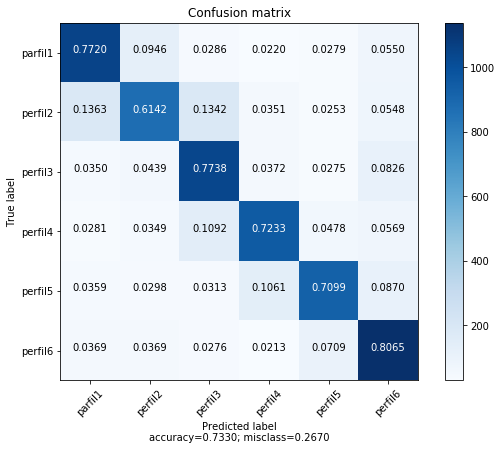

In [64]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rn), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

### Criação do vetor com as configurações ideais de cada um dos algoritmos

In [65]:
names = ["Decision_Tree", "Random_Forest", "XGB",
         "kNN", "Neural_Networks"]

classifiers = [dtc, random_forest, xg, knn, rn]

In [66]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

[22:43:42] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [67]:
df = pd.DataFrame()
df['Name'] = names
df['Score'] = scores

In [68]:
cm = sns.light_palette('g', as_cmap=True)
s = df.style.background_gradient(cmap = cm)
s

,Name,Score
0,Decision_Tree,0.785216
1,Random_Forest,0.844083
2,XGB,0.845062
3,kNN,0.70175
4,Neural_Networks,0.735406


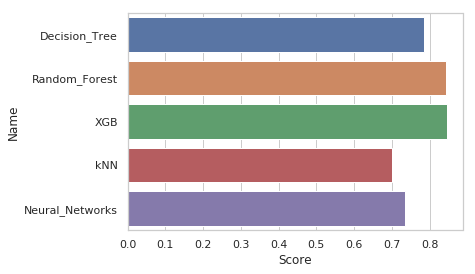

In [69]:
sns.set(style= 'whitegrid')
ax = sns.barplot(y = 'Name', x = 'Score', data = df)

Com isso, podemos observar o algoritmo XGBOOST teve o melhor desempenho dentre os outros algoritmos (apenas em termos de accurácia), claro que outros testes deveriam ser feitos, porém optei por escolha própria o uso do XGboost

<hr>

## Treino e teste do algoritmo Random Forest com kFold

In [70]:
resultados5 = []
for i in range(5):
    kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state= i)
    resultados = []
    for indice_treinamento, indice_teste in kfold.split(X, np.zeros(shape=(X.shape[0], 1))):
        # model definition
        xg_final = xgb.XGBClassifier(silent=False, nthread=-1, learning_rate =0.3, n_estimators=123, max_depth=7, gamma=0.1, subsample=0.6, colsample_bytree=0.8, objective= 'multi:softmax', num_class=6)

        # training model
        xg_final.fit(X[indice_treinamento], y[indice_treinamento])

        # prediction
        pred_final = xg_final.predict(X[indice_teste])
        precisao = accuracy_score(y[indice_teste], pred_final)
        resultados.append(precisao)
    resultados = np.asarray(resultados)
    media = resultados.mean()
    resultados5.append(media)

[22:45:23] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:45:39] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:45:55] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:46:10] WARNING: ..

In [71]:
resultados5 = np.asarray(resultados5)
for i in range(resultados5.size):
    print(str(str(resultados5[i]).replace('.', ',')))

0,8411176886258331
0,8422561590908308
0,8423293378094563
0,8422926945133693
0,8422925529293366


## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [72]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-20 23:01:41--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96291 (94K) [text/plain]
Saving to: ‘to_be_scored.csv’

100%[======================================>] 96,291      --.-K/s   in 0.004s  

2020-09-20 23:01:41 (20.9 MB/s) - ‘to_be_scored.csv’ saved [96291/96291]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [73]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
id                            1000 non-null int64
graduacao                     1000 non-null object
universidade                  1000 non-null object
profissao                     1000 non-null object
organizacao                   1000 non-null object
pretende_fazer_cursos_lit     1000 non-null int64
interesse_mba_lit             1000 non-null int64
importante_ter_certificado    1000 non-null int64
horas_semanais_estudo         1000 non-null int64
como_conheceu_lit             1000 non-null object
total_modulos                 1000 non-null int64
modulos_iniciados             1000 non-null int64
modulos_finalizados           1000 non-null int64
certificados                  1000 non-null int64
dtypes: int64(9), object(5)
memory usage: 109.5+ KB


In [74]:
# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['id', 'graduacao', 'universidade', 'organizacao', 'como_conheceu_lit'], inplace=False)

# 3.1 - Transformação da coluna 'graduação' para int
df_to_be_scored_3['profissao'] = lbp.fit_transform(df_to_be_scored_3['profissao'])

df_to_be_scored_3.tail()

,profissao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,4,0,0,1,2,245,63,45,1
996,3,1,1,1,8,163,111,96,0
997,7,1,1,1,9,56,10,4,0
998,8,1,1,1,9,138,60,30,0
999,0,0,0,1,9,22,20,19,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [75]:
df_training.columns

Index(['profissao', 'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'categoria'],
      dtype='object')

In [76]:
df_training[
    [
        'profissao', 'pretende_fazer_cursos_lit', 'interesse_mba_lit',
        'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
        'modulos_iniciados', 'modulos_finalizados', 'certificados'
    ]
].columns

Index(['profissao', 'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados'],
      dtype='object')

#### Predição

In [77]:
df_to_be_scored_3 = df_to_be_scored_3[
    [
        'profissao', 'pretende_fazer_cursos_lit', 'interesse_mba_lit',
        'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
        'modulos_iniciados', 'modulos_finalizados', 'certificados'
    ]
]

In [78]:
y_pred_finish = xg.predict(df_to_be_scored_3.values)
df_to_be_scored_3['target'] = y_pred_finish
df_to_be_scored_3.tail()

,profissao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,target
995,4,0,0,1,2,245,63,45,1,perfil1
996,3,1,1,1,8,163,111,96,0,perfil2
997,7,1,1,1,9,56,10,4,0,perfil6
998,8,1,1,1,9,138,60,30,0,perfil2
999,0,0,0,1,9,22,20,19,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [81]:
project.save_data(file_name="results.csv", data=df_to_be_scored_3.to_csv(index=False))

{'file_name': 'results2.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio6lit-donotdelete-pr-phkyxqfdccpkaq',
 'asset_id': 'a71a1602-9706-4770-a9c5-d4f099dcb884'}

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
